In [1]:
import pandas as pd
import numpy as np

# Simulated Data
np.random.seed(42)  # For reproducibility
date_range = pd.date_range(start="2024-01-01", periods=365, freq='D')
sensor_readings = np.random.normal(loc=50, scale=10, size=len(date_range))
hazard_logs = np.random.choice([0, 1], size=len(date_range), p=[0.95, 0.05])

# Create DataFrame
data = pd.DataFrame({
    'Date': date_range,
    'Sensor_Reading': sensor_readings,
    'Hazard_Log': hazard_logs
})
data.set_index('Date', inplace=True)
data.to_csv('historical_data.csv')
print(data.head())


            Sensor_Reading  Hazard_Log
Date                                  
2024-01-01       54.967142           0
2024-01-02       48.617357           1
2024-01-03       56.476885           0
2024-01-04       65.230299           1
2024-01-05       47.658466           0


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


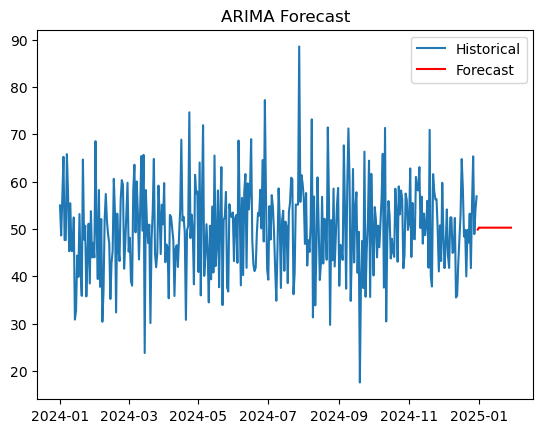

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# ARIMA Model
model = ARIMA(data['Sensor_Reading'], order=(1, 1, 1))
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=30)
plt.plot(data['Sensor_Reading'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


Epoch 1/20


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1332
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0367
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187
Epoch 15/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190
Epoch 16/20
12/12 ━━━━━━━━━━━

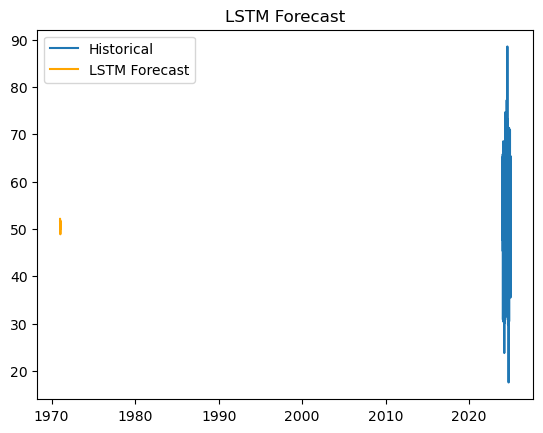

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Data Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Sensor_Reading']])

# Prepare Data for LSTM
lookback = 10
X, y = [], []
for i in range(len(scaled_data) - lookback):
    X.append(scaled_data[i:i+lookback])
    y.append(scaled_data[i+lookback])

X, y = np.array(X), np.array(y)

# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X, y, epochs=20, batch_size=32)

# Forecast
lstm_forecast = model.predict(X[-30:])
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Plot
plt.plot(data['Sensor_Reading'], label='Historical')
plt.plot(range(len(data), len(data)+30), lstm_forecast, label='LSTM Forecast', color='orange')
plt.legend()
plt.title('LSTM Forecast')
plt.show()


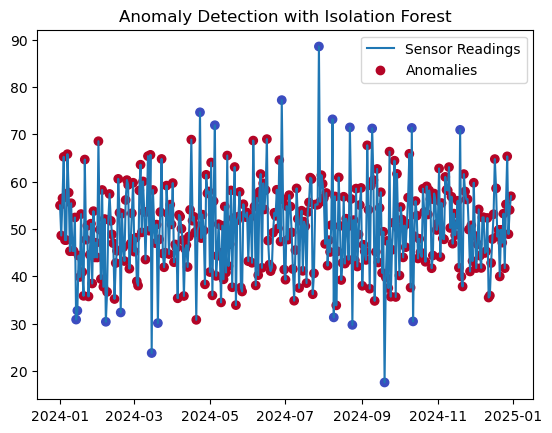

In [7]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = isolation_forest.fit_predict(data[['Sensor_Reading']])

# Plot Anomalies
plt.plot(data['Sensor_Reading'], label='Sensor Readings')
plt.scatter(data.index, data['Sensor_Reading'], c=data['Anomaly'], cmap='coolwarm', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection with Isolation Forest')
plt.show()


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - loss: 0.0266 
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.0259
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0232
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0235
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.0200
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.0191
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0162
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.0177
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.01677
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0159
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.0149
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137  
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0154
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 

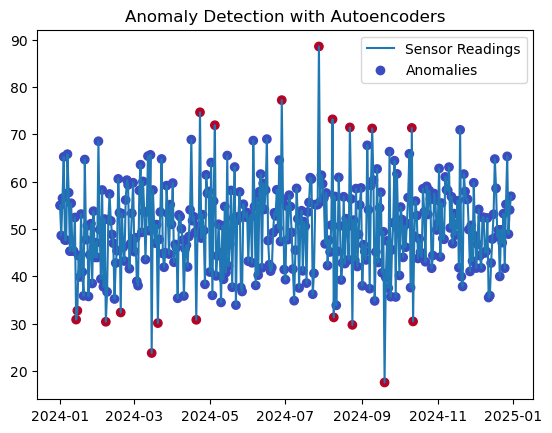

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Prepare Data
X_auto = scaled_data

# Autoencoder Model
input_dim = X_auto.shape[1]
encoding_dim = 5

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_auto, X_auto, epochs=50, batch_size=32)

# Reconstruction Error
reconstructions = autoencoder.predict(X_auto)
errors = np.mean((X_auto - reconstructions) ** 2, axis=1)

# Threshold for Anomalies
threshold = np.percentile(errors, 95)
data['Anomaly_Auto'] = errors > threshold

# Plot
plt.plot(data['Sensor_Reading'], label='Sensor Readings')
plt.scatter(data.index, data['Sensor_Reading'], c=data['Anomaly_Auto'], cmap='coolwarm', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection with Autoencoders')
plt.show()


In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare Data
X = data[['Sensor_Reading']]
y = data['Hazard_Log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[63  3]
 [ 7  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        66
           1       0.00      0.00      0.00         7

    accuracy                           0.86        73
   macro avg       0.45      0.48      0.46        73
weighted avg       0.81      0.86      0.84        73



In [13]:
import xgboost
print(xgboost.__version__)


2.1.2


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

arima_rmse = mean_squared_error(data['Sensor_Reading'][-30:], forecast[:30], squared=False)
arima_mape = mean_absolute_percentage_error(data['Sensor_Reading'][-30:], forecast[:30])

print(f"ARIMA RMSE: {arima_rmse}, MAPE: {arima_mape}")


ARIMA RMSE: 7.210985421702161, MAPE: 0.12329213426864154


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
